#### 필요 모듈 import

In [26]:
import numpy as np
from scipy.stats import *
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns

In [28]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

#### 전국 전기차 충전소 충전량 Data ( 2020.01.01~2020.06.28)

In [29]:
df = pd.read_csv('./data/station_charging_amount_2020_1.csv',encoding='cp949')
df.tail()

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
1048570,환경부,환경부,청도새마을휴게소(대구방향),급속01,11000133,경상북도 청도군 청도읍 하지길 59-50,급속,NaN,14.530,0,19,2020-06-28,2020-06-28 16:46:00,2020-06-28 17:06:00
1048571,광주전남,광산,수완동 행정복지센터,급속01,697,"광주광역시 광산구 장덕로 158 (수완동, 수완동행정복지센터/수완보건지소)",급속,50.0,28.770,0,41,2020-06-28,2020-06-28 20:03:00,2020-06-28 20:45:00
1048572,경기,이천,이천휴게소(하남방향),급속01,11,경기도 이천시 신둔면 용면리 산 86,급속,50.0,15.017,0,29,2020-06-28,2020-06-28 20:20:00,2020-06-28 20:49:00
1048573,인천,영종,영종힐스테이트,완속03,4300,인천광역시 중구 하늘별빛로 66,완속,7.0,10.500,3,49,2020-06-28,2020-06-28 17:00:00,2020-06-28 20:49:00
1048574,부산울산,남부산,남부산지사,급속01,442,부산광역시 해운대구 해운대해변로113,급속,50.0,0.002,0,0,2020-06-28,2020-06-28 20:45:00,2020-06-28 20:45:00


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   본부      1048575 non-null  object 
 1   사업소     1048575 non-null  object 
 2   충전소명    1048575 non-null  object 
 3   충전기     1048575 non-null  object 
 4   충전기ID   1048575 non-null  int64  
 5   주소      1048486 non-null  object 
 6   충전기구분   1048575 non-null  object 
 7   충전용량    1029401 non-null  float64
 8   충전량     1048575 non-null  float64
 9   충전시간    1048575 non-null  int64  
 10  충전분     1048575 non-null  int64  
 11  충전종료일자  1048575 non-null  object 
 12  충전시작시각  1048575 non-null  object 
 13  충전종료시각  1048575 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 112.0+ MB


In [31]:
df['충전소명'].value_counts()

종합경기장              9703
대평동 BRT전기버스 차고지    5068
제주공항               4618
빛가람동 공용차고지         4392
용산역 아이파크몰          4319
                   ... 
성내12통 공영주차장           1
태백산국립공원 유일사 주차장       1
LH 세종본부               1
광주시 차량등록사업소           1
양산종합운동장               1
Name: 충전소명, Length: 5033, dtype: int64

#### 전국 전기차 충전소 중 '휴게소', '쉼터' 키워드를 포함한 고속도로 휴게소에 설치된 충전소 충전량 정보만 추출 

In [32]:
final_df_2020_1 = df[df['충전소명'].str.contains('휴게소|쉼터')]

In [33]:
final_df_2020_1.to_csv('./data/2020_1data.csv')

In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13240 entries, 14 to 1048572
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   본부      13240 non-null  object 
 1   사업소     13240 non-null  object 
 2   충전소명    13240 non-null  object 
 3   충전기     13240 non-null  object 
 4   충전기ID   13240 non-null  int64  
 5   주소      13192 non-null  object 
 6   충전기구분   13240 non-null  object 
 7   충전용량    6229 non-null   float64
 8   충전량     13240 non-null  float64
 9   충전시간    13240 non-null  int64  
 10  충전분     13240 non-null  int64  
 11  충전종료일자  13240 non-null  object 
 12  충전시작시각  13240 non-null  object 
 13  충전종료시각  13240 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 1.5+ MB


In [108]:
# df.rename(columns = {'본부':'Area1','사업소':'Area2','충전소명':'StationName','충전기':'Charger','충전기ID':'ChargerID',
#                   '주소':'Address','충전기구분':'ChargerType','충전용량''ChargingCapacity','충전량':'Amount','충전시간':'Time_Hour',
#                   '충전분':'Time_Minute','충전종료일자':'EndDate','충전시작시간':'StartTime','충전종료시각':'EndTime'})

In [8]:
final_df['충전소명'].nunique() # 총 249개 휴게소에 설치, 결측치 없음

249

In [9]:
final_df.describe() # 기본통계량

,충전기ID,충전용량,충전량,충전시간,충전분
count,1.324000e+04,6229.0,13240.000000,13240.000000,13240.000000
mean,5.826835e+06,50.0,17.418392,0.053625,26.229834
std,5.489968e+06,0.0,10.076352,0.766585,13.269902
min,7.000000e+00,50.0,0.002000,-15.000000,0.000000
25%,1.200000e+01,50.0,9.959250,0.000000,16.000000
50%,1.100013e+07,50.0,16.380000,0.000000,26.000000
75%,1.100084e+07,50.0,23.502500,0.000000,38.000000
max,1.100403e+07,50.0,71.682000,77.000000,59.000000


In [10]:
final_df['충전소명'].value_counts().head(20) # 상위 13개 주유소에서 200회 이상씩 충전, 

오창휴게소(통영방향)         1242
영해농협 영덕휴게소           887
이천휴게소(하남방향)          756
오창휴게소(하남방향)          544
이천휴게소(통영방향)          486
음성휴게소(통영방향)          389
경주IC휴게소              352
철정휴게소                309
음성휴게소(하남방향)          305
화양강휴게소               286
서라벌광장휴게소             282
여수 대포리 졸음쉼터          258
무안 청호쉼터(광주방면 국도)     233
단양휴게소(부산방향)          117
칠곡휴게소(부산방향)           84
안성휴게소(부산방향)           73
거창휴게소(고서방향)           67
선산휴게소(마산방향)           65
평창휴게소(강릉방향)           65
천안휴게소(서울방향)           63
Name: 충전소명, dtype: int64

In [11]:
st_count = final_df['충전소명'].value_counts()
st_name = final_df['충전소명']

<AxesSubplot:xlabel='충전소명', ylabel='Count'>

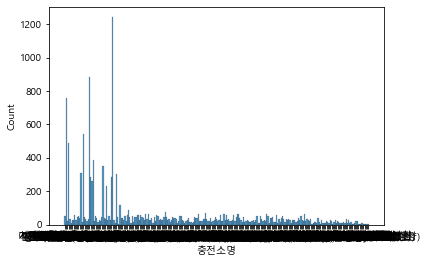

In [12]:
sns.histplot(x=final_df['충전소명'])
# 충전률이 특정 몇몇 휴게소에 집중되어 있음을 확인.

In [13]:
top13_list = list(final_df['충전소명'].value_counts().head(13))
sum(top13_list) / len(final_df) *100 # 상위 13개 주유소의 충전량이 전체 47% 차지

47.80211480362538

In [14]:
st_count.describe()
st_count.median()
# 충전소당 평균 53회 충전 / 중앙값 27 / 표준편차 122.40(산포도가 큼) / 
# 최댓값 1242 / 최솟값 1 >> boxplot으로 이상치 제거하고 확인 필요/

count     249.000000
mean       53.172691
std       122.936608
min         1.000000
25%        18.000000
50%        27.000000
75%        43.000000
max      1242.000000
Name: 충전소명, dtype: float64

27.0

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='충전소명'>

C:\Users\pbpmi\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pbpmi\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pbpmi\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pbpmi\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


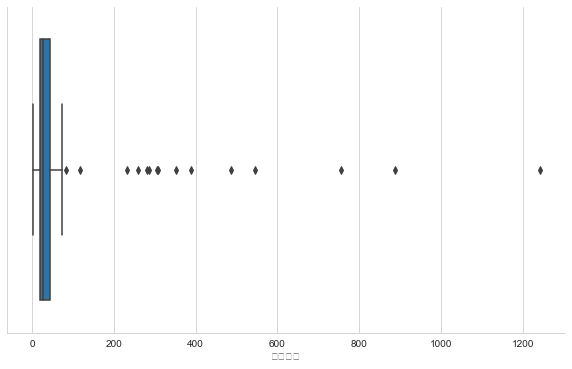

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.boxplot(x=final_df['충전소명'].value_counts())
sns.despine()
plt.show()
# 본 박스플롯을 통해 이상치가 있어, 평균을 신뢰할 수 없다는 판단을 내릴 수 있음.
# --> 이상치 제거 필요해보임.

#### 충전 시간이 비정상적으로 짧은(3분 이하) 데이터 추출: error_df
- 에러가 비교적 명확하게 특정 기기에 집중되어 있음
- 3분 이하 충전 중 동일한 기기에서 5분 이내 재충전 한 곳이 반복된 곳은 고장난 기기로 유추
- 시계열 데이터 분석 결과, 수리까지 1개월 이상 소요된 것으로 유추할 수 있음
→ 보다 빠른 수리가 필요하다고 제언할 수 있음

In [16]:
charge_min = list(final_df['충전분'])
charge_min

[22,
 19,
 42,
 41,
 31,
 16,
 31,
 27,
 41,
 14,
 41,
 31,
 40,
 28,
 41,
 25,
 25,
 9,
 23,
 29,
 25,
 9,
 25,
 24,
 12,
 17,
 39,
 56,
 1,
 23,
 4,
 23,
 29,
 32,
 43,
 11,
 18,
 28,
 23,
 32,
 38,
 47,
 26,
 4,
 38,
 27,
 14,
 33,
 40,
 36,
 29,
 23,
 23,
 36,
 20,
 40,
 9,
 27,
 37,
 1,
 29,
 46,
 40,
 43,
 3,
 14,
 30,
 4,
 45,
 41,
 26,
 23,
 33,
 15,
 23,
 44,
 9,
 35,
 18,
 32,
 22,
 33,
 42,
 3,
 42,
 3,
 41,
 25,
 35,
 15,
 5,
 36,
 23,
 47,
 32,
 19,
 13,
 21,
 16,
 21,
 21,
 19,
 17,
 15,
 11,
 37,
 28,
 40,
 29,
 42,
 42,
 38,
 43,
 17,
 36,
 41,
 33,
 21,
 49,
 15,
 34,
 33,
 18,
 40,
 26,
 40,
 15,
 6,
 25,
 23,
 1,
 13,
 43,
 11,
 39,
 41,
 34,
 28,
 22,
 3,
 37,
 8,
 1,
 30,
 27,
 26,
 21,
 39,
 42,
 21,
 23,
 16,
 27,
 49,
 12,
 22,
 53,
 4,
 14,
 12,
 40,
 28,
 41,
 0,
 46,
 19,
 19,
 11,
 32,
 28,
 12,
 47,
 23,
 48,
 40,
 33,
 18,
 28,
 27,
 20,
 43,
 26,
 32,
 32,
 25,
 2,
 15,
 18,
 8,
 32,
 24,
 21,
 34,
 9,
 27,
 6,
 18,
 29,
 43,
 25,
 42,
 12,
 19,
 8,
 41,


In [18]:
index1 = final_df[final_df['충전분']<=3].index
pprint(index1) # 충전시간이 3분 이하인 행의 인덱스 추출

Int64Index([   2267,    3759,    4252,    5279,    5373,    8813,    9233,
               9369,   10666,   13455,
            ...
            1029022, 1031659, 1031981, 1032295, 1032606, 1032791, 1033689,
            1034191, 1036893, 1046822],
           dtype='int64', length=543)


In [19]:
index2 = final_df[final_df['충전분']>=3].index
pprint(index2) # 충전시간이 3분 이상인 행의 인덱스 추출

Int64Index([     14,      98,     115,     241,     274,     621,     704,
                807,     848,     889,
            ...
            1048026, 1048152, 1048180, 1048241, 1048315, 1048329, 1048391,
            1048430, 1048570, 1048572],
           dtype='int64', length=12832)


In [20]:
error_df1 = final_df.drop(index2)
# error_df1 # 충전분이 3분 이하인 데이터만 포함(충전시간 확인X)한 데이터프레임
index3 = error_df1[error_df1['충전시간']>0].index
error_df = error_df1.drop(index3)
error_df # 전체 충전시간이 0시간 3분 이하인 데이터만 포함한 데이터프레임

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
3759,광주전남,무안,무안 청호쉼터(광주방면 국도),급속01,687,전라남도 무안군 일로읍 청호리 산 23-65(상행),급속,50.0,0.477,0,1,2020-01-01,2020-01-01 12:49:00,2020-01-01 12:50:00
8813,광주전남,무안,무안 청호쉼터(광주방면 국도),급속02,688,전라남도 무안군 일로읍 청호리 산 23-65(상행),급속,50.0,1.190,0,1,2020-01-02,2020-01-02 10:12:00,2020-01-02 10:14:00
13455,대구,경주,서라벌광장휴게소,급속02,8759,경상북도 경주시 율동 593,급속,50.0,1.980,0,2,2020-01-03,2020-01-03 09:13:00,2020-01-03 09:16:00
19239,환경부,환경부,춘천휴게소(춘천방향),급속01,11003444,강원도 춘천시 동내면 영서로 1432,급속,NaN,0.660,0,1,2020-01-04,2020-01-04 03:15:00,2020-01-04 03:16:00
19315,경기,이천,이천휴게소(하남방향),급속01,11,경기도 이천시 신둔면 용면리 산 86,급속,50.0,1.612,0,2,2020-01-04,2020-01-04 11:55:00,2020-01-04 11:58:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031981,환경부,환경부,곡성휴게소(순천방향),급속01,11000730,전라남도 곡성군 겸면 호남고속도로 49 (가정리),급속,NaN,0.740,0,1,2020-06-26,2020-06-26 13:48:00,2020-06-26 13:49:00
1032295,환경부,환경부,곡성휴게소(논산방향),급속01,11000728,전라남도 곡성군 겸면 호남고속도로 50 (가정리),급속,NaN,0.700,0,1,2020-06-26,2020-06-26 12:19:00,2020-06-26 12:20:00
1032791,환경부,환경부,섬진강휴게소(부산방향),급속01,11000078,전라남도 광양시 진월면 신아리,급속,NaN,0.770,0,1,2020-06-26,2020-06-26 14:07:00,2020-06-26 14:09:00
1033689,환경부,환경부,섬진강휴게소(부산방향),급속01,11003000,전라남도 광양시 진월면 섬진강매화로 141,급속,NaN,0.830,0,1,2020-06-26,2020-06-26 14:11:00,2020-06-26 14:13:00


In [25]:
# error_df.to_csv('./charging_error_data.csv') --> 저장완료

In [22]:
error_df['충전기ID'].value_counts().head(10)
# 전체 오류 발생(3분 이하 충전) 충전기ID 추출
# 7 기기에서 총 55건 발생(전체 13.28%)

11          19
9           13
7           10
8           10
687          8
1191         8
12           8
688          7
8741         6
11000171     6
Name: 충전기ID, dtype: int64

In [24]:
errortop10 = list(error_df['충전기ID'].value_counts().head(10))
sum(errortop10) / len(error_df) * 100
# 상위 10개 충전기기에서의 오류 발생 확률은 약 29%
# 비교적 고르게 분포하고 있어, 특정 기기에서 많이 발생한 것은 미숙한 운전자 1명이 여러 회 시도했다고 추측.

29.96845425867508